## import
* 관용적으로 sns라는 별칭 사용
* matplotlib.pyplot과 호환

In [94]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 전역 설정

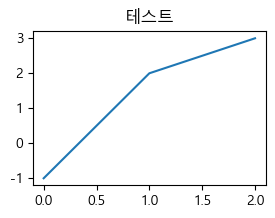

In [95]:
# ----------------------------------
# font 전역설정
# ----------------------------------
plt.rc('font', family='Malgun Gothic')
plt.rc('axes', unicode_minus=False)
pd.Series([-1,2,3]).plot(title='테스트', figsize=(3,2))

# ----------------------------------
# figsize 전역설정
# ----------------------------------
plt.rc('figure', figsize=(4,3))

## 샘플 데이터 준비

In [96]:
import seaborn as sns
tips = sns.load_dataset('tips')
iris = sns.load_dataset('iris')
titanic = sns.load_dataset('titanic')

## Seaborn 사용법
* `sns.그래프(x축데이터, y축데이터)`
* `sns.그래프(data=데이터프레임, x='x축컬럼명', y='축컬럼명')`
>* 주요 파라미터
>  * `hue` = '그룹기준컬럼명'
>  * `estimator` = 집계함수(bar그래프)

## barplot

In [97]:
# --------------------
# tips
# --------------------

tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


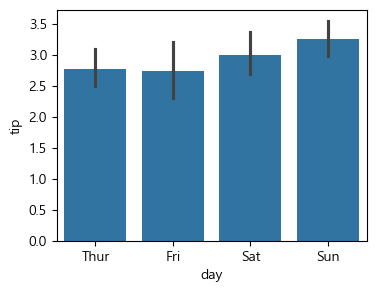

In [98]:
# ------------------------
# 요일별 tip 평균
# ------------------------
sns.barplot(data=tips, x='day', y='tip');

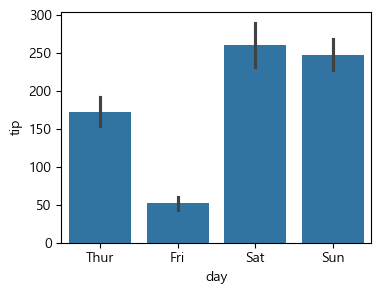

In [99]:
# ------------------------
# 요일별 tip 합계
# ------------------------
sns.barplot(data=tips, x='day', y='tip', estimator='sum');

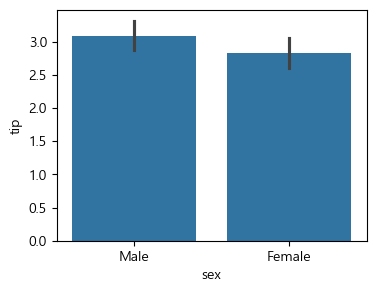

In [100]:
# -----------------------------------
# 성별 팁 평균
# -----------------------------------

sns.barplot(data=tips, x='sex', y='tip');


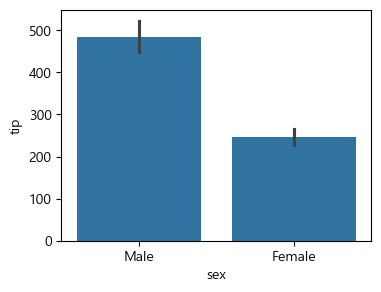

In [101]:
# -----------------------------------
# 성별 팁 합계
# -----------------------------------

sns.barplot(data=tips, x='sex', y='tip', estimator='sum');


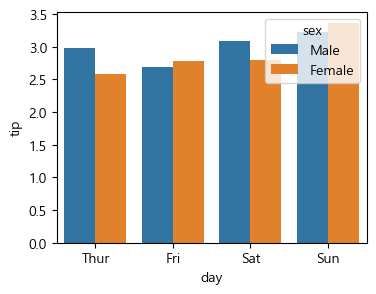

In [102]:
# -----------------------------------
# 요일별 평균을 그린다.
#   - 각 막대를 성별로 구분한다(중첩막대)
#   - hue 옵션 사용
# -----------------------------------

sns.barplot(data=tips, x='day', y='tip',
            hue='sex',
            errorbar=None);

## scatterplot
* hue : 색깔로 구분
* size : 데이터의 크기 표현

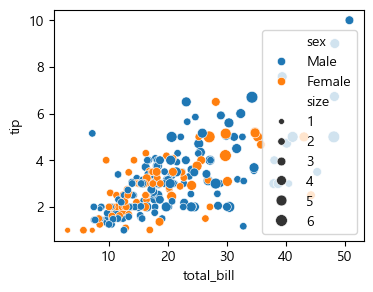

In [103]:
# -----------------------------------
# 지불금액(total_bill)에 따른 팁(tip)
#   - 점의 색으로 성별 구분
#   - 점의 크기로 테이블 인원수(size) 구분
# -----------------------------------

sns.scatterplot(data=tips, x='total_bill', y='tip', 
                hue='sex', size='size')
plt.show()

## regplot
* 회귀 시각화
    * 산점도와 함께 선형회귀선을 그려줌
    * 두 변수 간의 관계를 시각적으로 분석할 때 유용
* 그래프 스타일 
    * scatter_kws : 산점도 스타일
    * line_kws : 회귀선 스타일

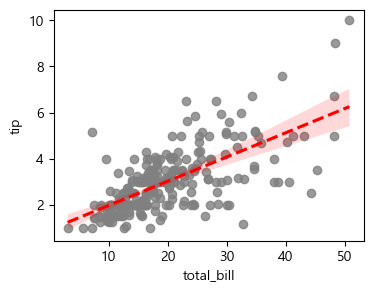

In [121]:
# -----------------------------
# total_bill과 tip의 산점도와 선형회귀선
# 산점도 스타일 : scatter_kws
# 회귀선 스타일 : lin_kws
# -----------------------------

sns.regplot(data=tips, x='total_bill', y='tip',
            scatter_kws={'color':'gray'},
            line_kws={'color':'red', 'linestyle':'--'})
plt.show()

## barplot

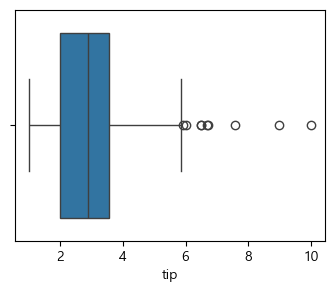

In [122]:
# -----------------------------
# tip의 분포(가로모양)
# -----------------------------

sns.boxplot(data=tips, x='tip');


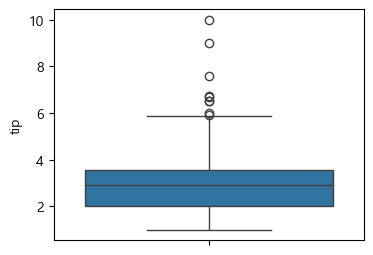

In [106]:
# -----------------------------
# tip의 분포(세로모양)
# -----------------------------

sns.boxplot(data=tips, y='tip');

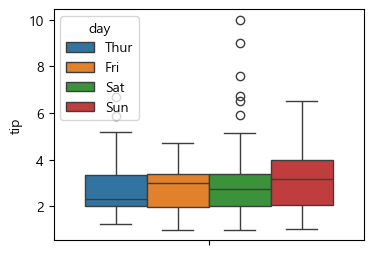

In [107]:
# -----------------------------
# 요일별 tip의 분포
# -----------------------------

sns.boxplot(data=tips, y='tip',
            hue='day');

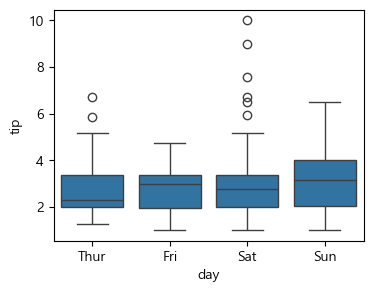

In [108]:
# -----------------------------
# 요일별 tip의 분포
# -----------------------------

sns.boxplot(data=tips, x='day', y ='tip');

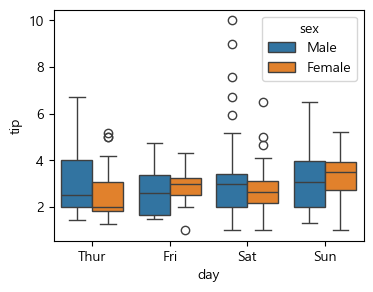

In [109]:
# -----------------------------
# 요일별 tip의 분포를 성별로 구분
# -----------------------------

sns.boxplot(data=tips, x='day', y ='tip', hue='sex');

## violinplot

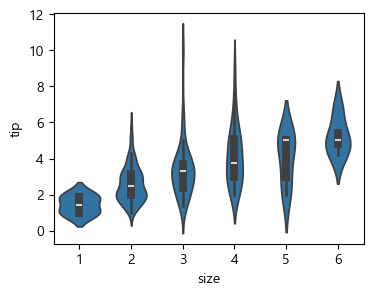

In [110]:
# ---------------------
# 테이블 인원에 따른 팁의 분포
# ---------------------
sns.violinplot(data=tips, x='size',y='tip');

In [111]:
# -------------
# titanic
# -------------
titanic.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


## histplot
* kde(커널밀도추정)
    * 데이터의 분포를 부드럽게 그린 곡선 형태의 그래프

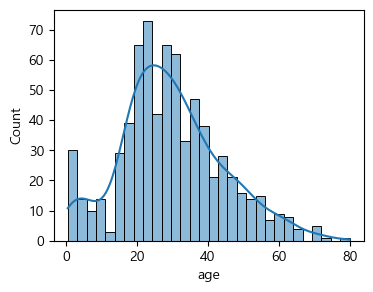

In [112]:
# ---------------------
# titanic - age의 분포 (히스토그램)
# ---------------------

sns.histplot(data=titanic, x='age', bins=30,
             kde=True);

## countplot
* 데이터의 빈도수 시각화
* `sns.histplot(data=데이터프레임, x='범주형컬럼')`

In [113]:
# ---------------------
# titanic - who의 빈도수
# ---------------------

titanic['who'].value_counts()

who
man      537
woman    271
child     83
Name: count, dtype: int64

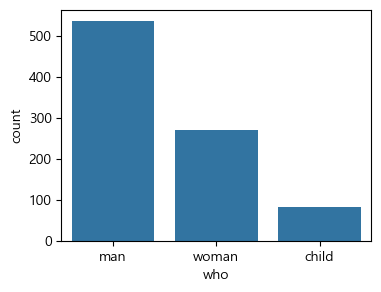

In [114]:
# ---------------------
# titanic - who의 빈도수 시각화
# ---------------------
sns.countplot(data=titanic, x='who');

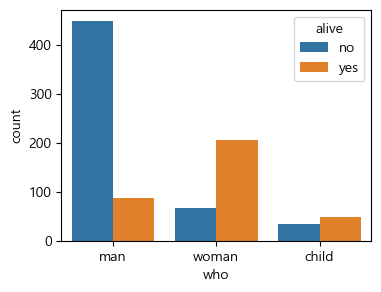

In [115]:
# ---------------------
# titanic - who의 빈도수 시각화 결과에서
# 각 범주를 한번 더 나누기 ()
# ---------------------
sns.countplot(data=titanic, x='who',
              hue='alive');

In [116]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## heatmap

In [117]:
# 상품군 리스트
categories = ['의류', '가전', '식품', '생활용품', '뷰티', '스포츠', '도서']

# 월 리스트
months = ['1월', '2월', '3월', '4월', '5월', '6월', 
          '7월', '8월', '9월', '10월', '11월', '12월']

# 랜덤한 매출 데이터 생성
np.random.seed(42)
data = np.random.randint(50, 500, size=(len(categories), len(months)))

# DataFrame 생성
df_sales = pd.DataFrame(data, index=categories, columns=months)
df_sales


,1월,2월,3월,4월,5월,6월,7월,8월,9월,10월,11월,12월
의류,152,485,398,320,156,121,238,70,152,171,264,380
가전,137,422,149,409,201,180,199,358,307,393,463,343
식품,435,241,493,326,210,363,71,302,285,394,98,108
생활용품,219,237,320,239,495,224,495,100,413,104,293,369
뷰티,180,356,184,70,378,216,323,437,138,365,63,291
스포츠,314,395,102,435,389,141,416,493,477,313,480,84
도서,255,130,469,99,409,437,51,439,103,155,309,359


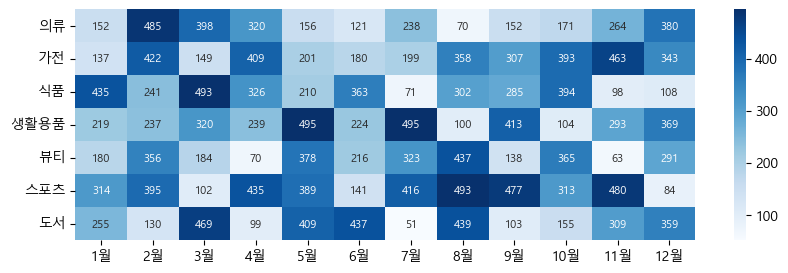

In [118]:
plt.figure(figsize=(10,3))
sns.heatmap(df_sales, 
            cmap='Blues', annot=True, fmt='d',
            annot_kws={'size':8});


## pairplot
* 수치형 변수간의 관계를 한눈에 시각화
    * 수치형 변수들 간의 조합별 scatterplot, 히스토그램/kde를 행열 형태로 시각화
* cmap : https://seaborn.pydata.org/tutorial/color_palettes.html

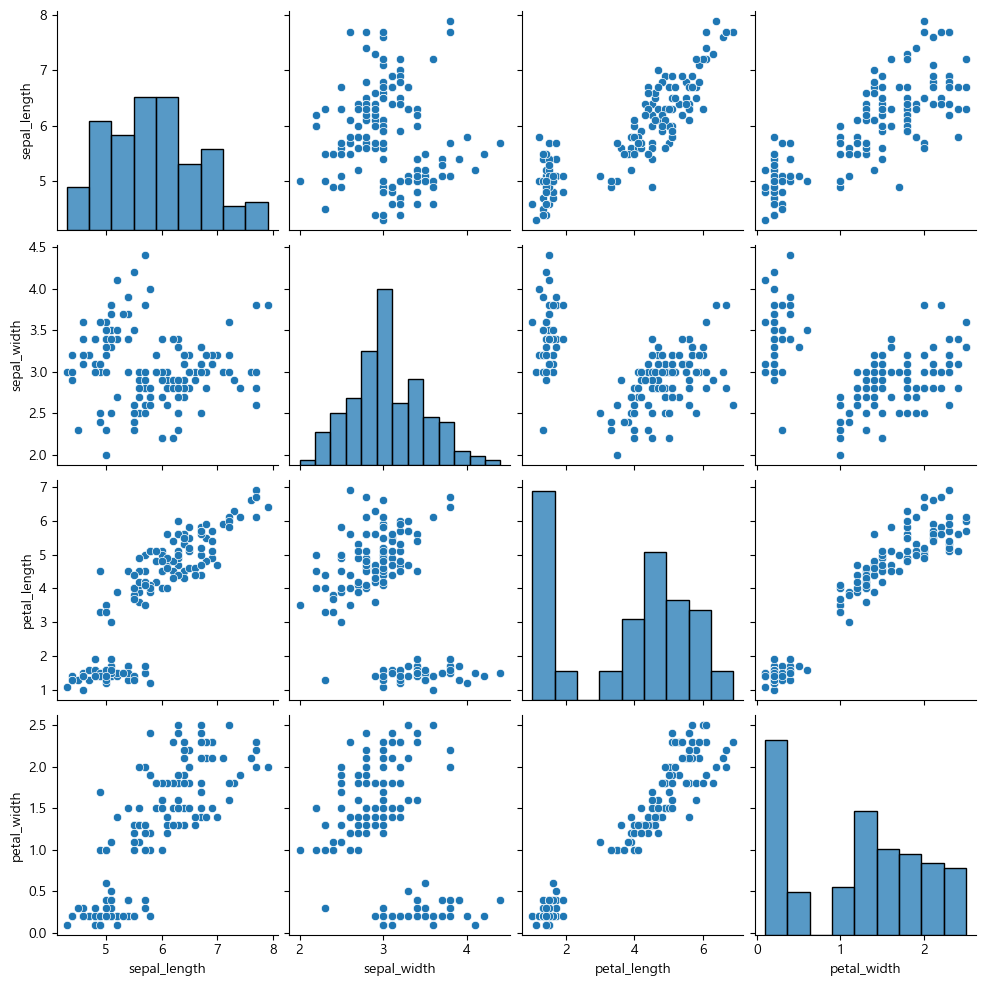

In [119]:
sns.pairplot(iris);

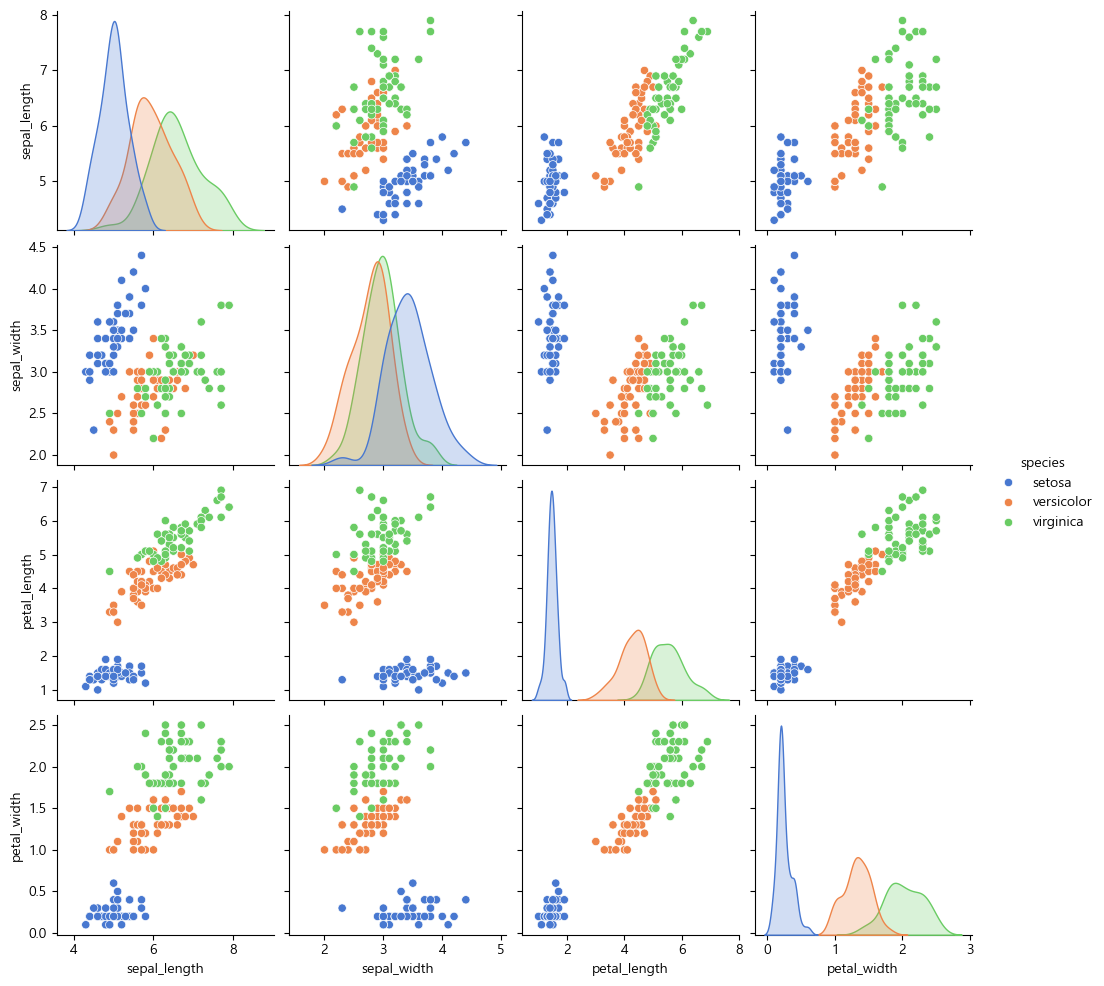

In [120]:
sns.pairplot(iris, hue='species', palette='muted');